__<h1> Linear Algebra (CpE210A)__

__<h2> Laboratory 2: Plotting Vectors using NumPy and MatPlotLib__

Coded and Submitted by:
<br> _Vitales, Nicole Keith D._
<br> Section: 58010

__Lab Exercise:__

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

__<h1> Part 1: Skyline Eagle Fly__


You are tasked to make a tracking device for the Philippine Eagles at the Philippine Eagle Center at Davao. The tracker sensors ony give the longitudinal and latitudinal distance (meters) of the eagle's position relative to their nests which we will treat as the origin of the tracking view. We want to determine the relative __displacement__ of the eagle from its nest. It is expected that the eagles will change exactly two times, it can be assumed that the program will show three displacement. Please make a prototype code using the additional information given below:


Consider the computational algorithm:

Let the eagle's longitudinal and latitudinal be $long$ and $lat$ respectively.
Let the eagle's total distance as $dis_{total}$, displacement be $disp$, and $\theta$ as the direction of the vector

$_{(Ep.1)} dist_{total} = (long_{total}) \hat{x} + (lat_{total}) \hat{y} \\_{(Ep.2)} disp = \sqrt{{dist_x}^2 + {dist_y}^2}\\_{(Ep.3)} \theta = \arctan{\left(\frac{y}{\alpha + x} \right)}$

In [46]:
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3) 
    lat = np.random.randint(-10,10, size=3)
    
    dist1 = np.array([5, 10])
    dist2 = np.array([6, 12])
    dist3 = np.array([7,-14])
    
    dist_total = dist1+dist2+dist3
    dist_x_total = dist1[0]+dist2[0]+dist3[0]
    dist_y_total = dist1[1]+dist2[1]+dist3[1]
    disp =  np.sqrt(((dist_x_total) **2) + ((dist_y_total) **2))                          
    alpha = 10**-6
    theta = np.arctan(dist_y_total/alpha + (dist_x_total))
    theta = np.degrees(theta)

    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
   
    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue', 
               label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
               label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
               label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()

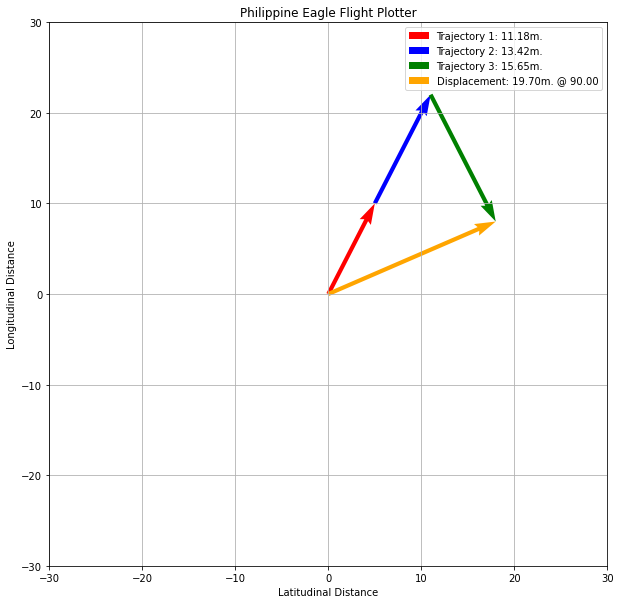

In [47]:
track_eagle(make_figs=True) 

<h2> Guide questions:

1. What is the use of the variable  α ?
    <br>-The alpha variable is use to adjust the transparency of a graph[1]. Also the alpha is used to find the angle of the eagle of its velocity.
    
     <br>
2. Kindly explain the process of plotting the eagle flight vectors.
    <br>-The process of plotting the eagle flight vectors is by setting up the array for each distance, a quiver plot is a type of 2D plot that shows vector lines as arrows[2]. Like it said in the discussion the 0,0 or the x,y are the tail or the location of the arrow, the next in x,y are u,v which are the arrow is headed or the head of the vector, the angle is the angle of the arrowhead, the scale unit is the value the multiplied to the length, the scale is the size of the arrow[3].
    
     <br>
3. Provide a flow chart describing the 'track_eagle' function. Please use LucidCharts or similar apps in making charts.
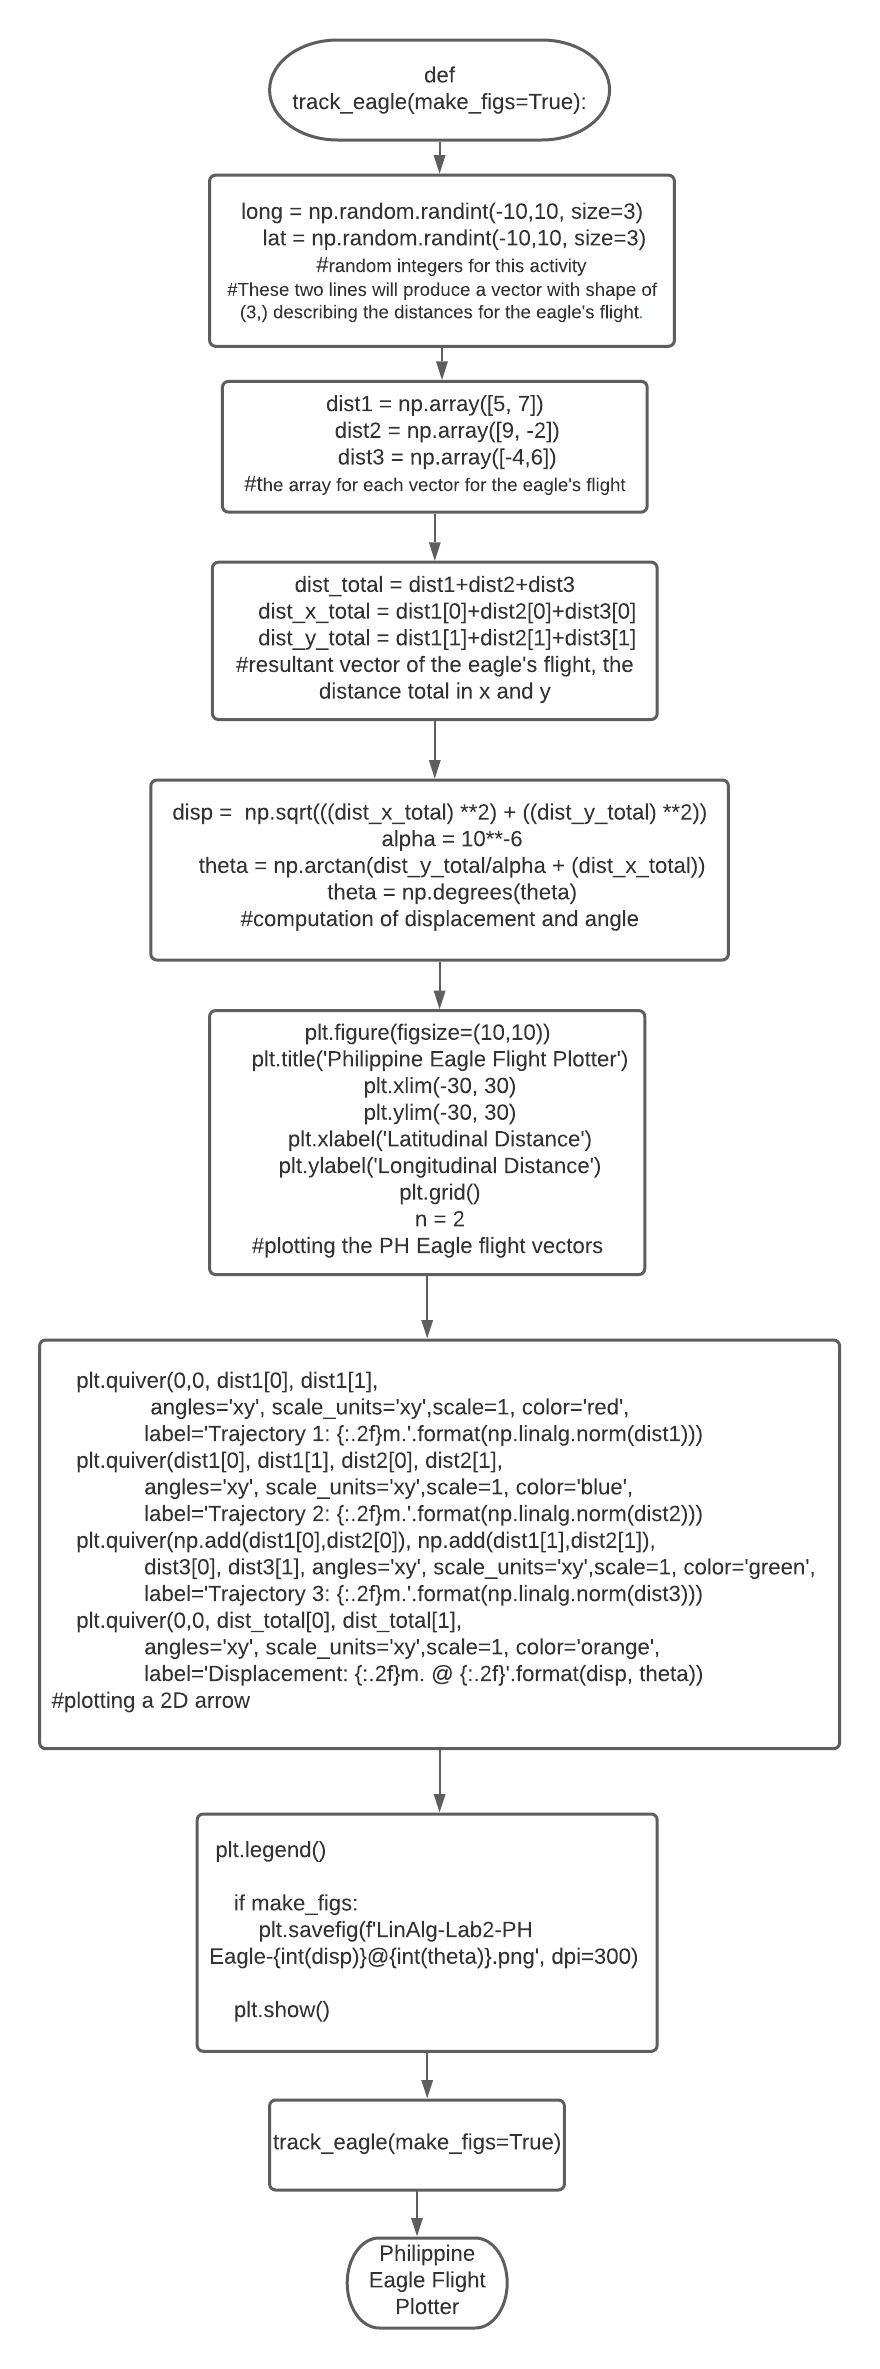
<br>_Note: provide 4 screenshots of the "Philippine Eagle Flight Plotter" figure._
<br>(This will be in the lab report)

<h1> Part 2: Reverse Engineering

Your project manager found out that the previous engineer that handled the project did some sort of algorithm regarding the eagles. He gave you the piece code for you to analyze and required you to make a documentation out of it. The code is given below.

$s_t = (\hat{a},\hat{b},\hat{c},\hat{d}) + (\hat{a}x^3 + \hat{b}x^2 + \hat{c}x + x) \\v_t = 3\hat{a}x^2 + 2\hat{b}x + \hat{c} \\a_t = 6\hat{a}x + 2\hat{b}$

_This equstion used to solve the eagle kinematics, which is the given array had been a result or had been an output of tuples._

In [14]:
def eagle_kinematics(s, t):                                      
    vector_shape = 4                        ##the shape of the vector that is given is (4,) for the kinematics of eagle 
    
    v = np.zeros((vector_shape-1,))         ##'np.zeros' is a return a new array of given shape and type
    a = np.zeros((vector_shape-2,))         ##the variable 'v', with the given shape is minus to 1
    t_vector = np.array([t**3, t**2, t, 1])   ##same with variable 'a', with the given shape is minus to 2
                                            ##'t_vector' is a given vector, that needs to be multiply with the given number
                                            ## in the variable of 't'
    
    ##the motion of the eagle
    if s.shape == (vector_shape,):          ##a shape of the vector that is given (4,) is equal to the shape of the 's'
        v = np.array([3*s[0],2*s[1], s[2]]) ##this vector that needs to be multiply in the shape of the 's'
        a = np.array([2*v[0],v[1]])         ##this vector that needs to be multiply in the vector 'v'
        
        ##the computation of the motion
        s_t = np.sum(np.multiply(s, t_vector))        
        v_t = np.sum(np.multiply(v, t_vector[1:]))
        a_t = np.sum(np.multiply(a, t_vector[2:]))
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({vector_shape},)')
    
    return s_t, v_t, a_t

In [15]:
x = np.array([2,1,3,2])         ##this is the vector 's' that need to e multiple in vector 'v'
t = 2                           ##this variable the needs to be multiple in 't_vector'
eagle_kinematics(s, t)

(28, 31, 26)

<h2> Guide questions:

1. What is the function for? Explain the inputs, process, functions used, and the outputs.
    <br> -The function of the above code is the study of the eagles kinematics or the motion of the eagle. To compute the velocity vector and the accelertion vector, the function that had been used are np.multiply and np.sum to compute the vectors, while the np.zero and np.array is the vector. The output is in vector.\
    
     <br>
2. Kindly provide equations for  st , vt , and  at  basing on their code.

 <br>
3. Re-type the 'eagle_kinematics' function in your jupyter notebook. Write a brief description of the function before the code cell in a markdown. Include the equations from (2.).

_Note: in your lab report, the equation should also be included as a part of the discussion. DO NOT insert the function as a picture, rather, insert it as an MS Equation. For equations in jupyter notebooks, it should be in  LaTeX ._

# Part 3: Bebang's Online Business

You have a friend named Bebang who has an online business in which she sells donuts. She asks you to make something that helps her to observe the increase and decrease of her profit considering the reach of her online posts. As novice data analytic engineers, you suggest to make a plotter using vectors of her weekly profit and FB post reach for a month. She is amazed that you have this idea and will pay you 15,000 PHP for the program. Thus you venture in implementing your idea with the PH Eagle Tracker as the base code.

In [26]:
def month_profit_trace(profit, reach, make_figs=True): 
    revenue = np.random.randint(-10,10, size=4)                  

    if (profit.shape == (4,)) and (revenue.shape == (4,)): ## Profit and revenue vector with a size of (4,0) 
        
        
        week1 = np.array((reach[0], profit[0]))            ## Array of each week
        week2 = np.array((reach[1], profit[1]))
        week3 = np.array((reach[2], profit[2]))
        week4 = np.array((reach[3], profit[3]))  
        
        week_total = week1 + week2 + week3 + week4                        ## computing of total weeks
        reach_total = reach[0] + reach[1] + reach[2] + reach[3]           ## computing for total reach
        profit_total = profit[0] + profit[1] + profit[2] + profit[3]      ## computing for total profit
        
        week_performance = np.sqrt(((reach_total)**2) + ((profit_total)**2))  ## computation for week_performance
        alpha = 10**-6
        reach_gradient = np.arctan(profit_total/alpha + (reach_total))     ## computation for reach_gradient
        
        #plotting of Bebang's Online Business
        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        n = 2
        
        ## this quiver plot is a type of 2D plot that shows vector lines as arrows
        plt.quiver(0,0, week1[0], week1[1], 
                   angles='xy', scale_units='xy',scale=1, color='yellowgreen', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        plt.quiver(week1[0], week1[1], week2[0], week2[1],
                   angles='xy', scale_units='xy',scale=1, color='yellow', width=0.0025,
                   label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        
        w3 = week1 + week2 #total week of week 1 and 2, to be the tail of the week3
        plt.quiver(w3[0],w3[1], week3[0], week3[1], angles='xy', scale_units='xy',scale=1, color='green', 
                   width=0.0025, label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        
        w4 = week1 + week2 + week3 #total week of week 1, 2 and 3, to be the tail of the week4
        plt.quiver(w4[0], w4[1],week4[0], week4[1], angles='xy', scale_units='xy',scale=1, color='orange', 
                   width=0.0025, label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))
        plt.quiver(0,0, week_total[0], week_total[1], 
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.005,
                   label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))

        plt.legend(loc='upper left') ## data of weeks

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300) 
            ## Save the current figure

        plt.show() ## display a figure
    
    else:
        print('Cannot be identify the profit and reach') 

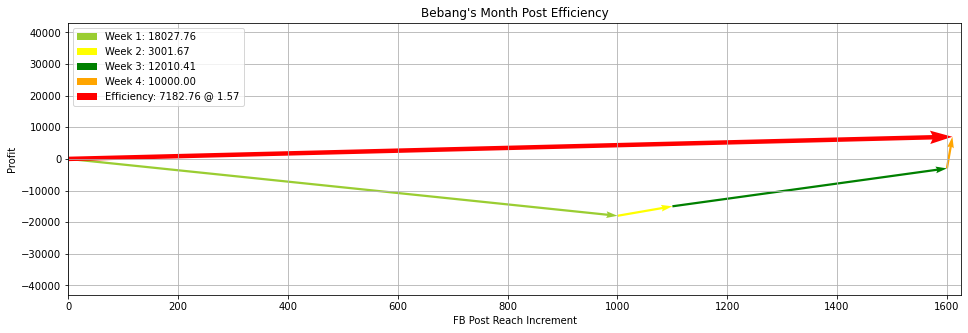

In [37]:
profit= np.array([-18000, 3000, 12000, 10000])    ## You can change the values to make different scenarios
reach = np.array([1000, 100, 500, 10])             ## You can change the values to make different scenarios

month_profit_trace(profit, reach, make_figs=False) ## Toggle 'make_figs' during debugging or making documentations

<h2>Guide questions:

1. What is the relationship between the FB post reach and the profit?
 <br>   -The relationship between the FB post reach and the profit as the FB post goes down the profit also goes down which means the FB post didn't attract much attention, but when the FB post goes up it means that many had saw the post and gets muh attention which the profit will comes in.
 
 <br>
2. Why is profit in the y-axis and FB post reach on the x-axis and not the other way around?
 <br>  -Because the profit is dependent in the FB post especially this is a online selling that social media is a good strategy to attract more customer, so that the profit also goes in.
 
  <br>
3. Kindly explain the process of plotting the post efficiency vectors.
<br> -In plotting the post efficiency vectors the part 1 became a reference as it is the same as the part 1 in part 3, most of the plotting function came in part 1.

 <br>
4. Provide a necessary equations that are representative to finding the  performanceweek  and  reachgradient.
<br> -The equation use to find the performanceweek is the same as in part 1 which is finding the displacement of the eagle which is the pythagorean theorem that has the equationin part of np.sqrt(((dist_x_total/2) **2) + ((dist_y_total/2) **2)) , while the reachgradientis the same equation of theta in part 1 that has a equation of np.arctan(dist_y_total/alpha + (dist_x_total)).

 <br>
5. Try to alter the 'reach' and 'profit' values to display different scenarios. Save at least 3 scenarios then append and discuss the figures in your report.
<br> (This answer will see in the Lab Report.)

 <br>
6. What can be observed and concluded with the behavior of the vectors with respect to post efficiency?
<br> (This question will be answer in the Lab Report.)

<h2>Discussions

_<h3> For your observations section, kindly answer the guide questions._

_<h3> Kindly answer these questions on the conclusion section of your laboratory report._

1. Enumerate and briefly discuss the functions you have used in the laboratory exercise, please cite their usage using their respective documentations. (min of 200 words)
2. How do vectors relate to real-life values? (min of 50 words)
3. Kindly give other examples of how vectors are used or other real-life situations that can be modeled using vectors? (min of 100 words and do proper citation)

<h2> References:

[1]"How to Change the Transparency of a Graph Plot in Matplotlib with Python", Learningaboutelectronics.com, 2020. [Online]. Available: http://www.learningaboutelectronics.com/Articles/How-to-change-the-transparency-of-a-graph-plot-in-matplotlib-with-Python.php#:~:text=Matplotlib%20allows%20you%20to%20adjust,plot%20using%20the%20alpha%20attribute.&text=If%20you%20want%20to%20make,make%20alpha%20greater%20than%201. [Accessed: 04- Oct- 2020].
<br>[2]P. Kazarinoff, "Quiver plots using Python, matplotlib and Jupyter notebooks", Python for Undergraduate Engineers, 2020. [Online]. Available: https://pythonforundergradengineers.com/quiver-plot-with-matplotlib-and-jupyter-notebooks.html#:~:text=A%20quiver%20plot%20is%20a%20type%20of%202D,use%20Python%2C%20matplotlib%2C%20numpy%20and%20a%20Jupyter%20notebook. [Accessed: 04- Oct- 2020].
<br>[3]"plotly.figure_factory.create_quiver — 4.11.0 documentation", Plotly.com, 2020. [Online]. Available: https://plotly.com/python-api-reference/generated/plotly.figure_factory.create_quiver.html. [Accessed: 04- Oct- 2020].